In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
data=pd.read_csv(r"D:\guvi\datasets\taxi_fare.csv")

In [65]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [66]:
print(data.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [67]:
print(data.duplicated().sum())


0


In [68]:
print(data.nunique())

VendorID                     2
tpep_pickup_datetime     61208
tpep_dropoff_datetime    63607
passenger_count              7
pickup_longitude         14794
pickup_latitude          30504
RatecodeID                   7
store_and_fwd_flag           2
dropoff_longitude        18029
dropoff_latitude         34903
payment_type                 4
fare_amount                341
extra                        5
mta_tax                      3
tip_amount                1224
tolls_amount               109
improvement_surcharge        3
total_amount              2727
dtype: int64


In [69]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'],utc=True)
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'],utc=True)

In [70]:
print(data['store_and_fwd_flag'].unique())

['N' 'Y']


In [71]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
data['store_and_fwd_flag']=ordinal_encoder.fit_transform(data[['store_and_fwd_flag']])

In [72]:
for col in data.columns:
    print(f"{col}:",data[col].nunique,data[col].unique())
    print()

VendorID: <bound method IndexOpsMixin.nunique of 0         1
1         1
2         2
3         2
4         2
         ..
212340    2
212341    2
212342    2
212343    1
212344    1
Name: VendorID, Length: 212345, dtype: int64> [1 2]

tpep_pickup_datetime: <bound method IndexOpsMixin.nunique of 0        2016-03-01 00:00:00+00:00
1        2016-03-01 00:00:00+00:00
2        2016-03-01 00:00:00+00:00
3        2016-03-01 00:00:00+00:00
4        2016-03-01 00:00:00+00:00
                    ...           
212340   2016-03-01 12:15:37+00:00
212341   2016-03-01 12:15:37+00:00
212342   2016-03-01 12:15:37+00:00
212343   2016-03-01 12:15:38+00:00
212344   2016-03-01 12:15:38+00:00
Name: tpep_pickup_datetime, Length: 212345, dtype: datetime64[ns, UTC]> <DatetimeArray>
['2016-03-01 00:00:00+00:00', '2016-03-01 00:00:01+00:00',
 '2016-03-01 00:00:02+00:00', '2016-03-01 00:00:03+00:00',
 '2016-03-01 00:00:04+00:00', '2016-03-01 00:00:05+00:00',
 '2016-03-01 00:00:06+00:00', '2016-03-01 00:00:07+00:0

In [73]:
print(data[data['fare_amount']<0])

        VendorID      tpep_pickup_datetime     tpep_dropoff_datetime  \
407            2 2016-03-10 07:08:46+00:00 2016-03-10 07:14:05+00:00   
1119           2 2016-03-10 07:13:33+00:00 2016-03-10 08:44:31+00:00   
2231           2 2016-03-10 07:20:20+00:00 2016-03-10 07:28:23+00:00   
4138           2 2016-03-10 07:31:49+00:00 2016-03-10 07:32:10+00:00   
6585           2 2016-03-10 07:44:24+00:00 2016-03-10 07:45:25+00:00   
...          ...                       ...                       ...   
203293         2 2016-03-01 11:44:29+00:00 2016-03-01 11:45:14+00:00   
204041         2 2016-03-01 11:47:10+00:00 2016-03-01 11:48:11+00:00   
208970         2 2016-03-01 12:04:23+00:00 2016-03-01 12:10:41+00:00   
209202         2 2016-03-01 12:05:09+00:00 2016-03-01 12:09:07+00:00   
210921         2 2016-03-01 12:10:56+00:00 2016-03-01 12:11:43+00:00   

        passenger_count  pickup_longitude  pickup_latitude  RatecodeID  \
407                   1        -73.957062        40.802132   

In [74]:
(len(data[data['fare_amount']<0])/len(data))*100
data=data[data['fare_amount']>=0].reset_index(drop=True)

In [75]:
data.shape
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000
mean,1.708192,1.766339,-73.114137,40.280514,1.034098,0.003114,-73.146207,40.296765,1.323927,12.674500,0.048146,0.498148,1.810291,0.329213,0.299936,15.660219
std,0.454595,1.469499,7.927481,4.365669,0.494613,0.055720,7.785200,4.287851,0.476000,10.869841,0.148046,0.030371,2.507685,2.028692,0.004368,13.585929
min,1.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990898,40.740292,1.000000,0.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,0.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963303,40.770283,1.000000,0.000000,-73.964653,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000
max,2.000000,6.000000,0.000000,42.786934,99.000000,1.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [76]:
def haversine_distance(lat1, lon1, lat2, lon2):

    R = 6371

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0) ** 2 + (np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2)

    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

data['trip_distance_km'] = haversine_distance(
    data['pickup_latitude'],
    data['pickup_longitude'],
    data['dropoff_latitude'],
    data['dropoff_longitude'])


In [77]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km
count,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000
mean,1.708192,1.766339,-73.114137,40.280514,1.034098,0.003114,-73.146207,40.296765,1.323927,12.674500,0.048146,0.498148,1.810291,0.329213,0.299936,15.660219,24.923993
std,0.454595,1.469499,7.927481,4.365669,0.494613,0.055720,7.785200,4.287851,0.476000,10.869841,0.148046,0.030371,2.507685,2.028692,0.004368,13.585929,433.249539
min,1.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990898,40.740292,1.000000,0.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.156043
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,0.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000,1.938337
75%,2.000000,2.000000,-73.963303,40.770283,1.000000,0.000000,-73.964653,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000,3.566124
max,2.000000,6.000000,0.000000,42.786934,99.000000,1.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000,8713.463111


In [78]:
data['RatecodeID']=ordinal_encoder.fit_transform(data[['RatecodeID']])


In [79]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km
count,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000
mean,1.708192,1.766339,-73.114137,40.280514,0.032364,0.003114,-73.146207,40.296765,1.323927,12.674500,0.048146,0.498148,1.810291,0.329213,0.299936,15.660219,24.923993
std,0.454595,1.469499,7.927481,4.365669,0.253832,0.055720,7.785200,4.287851,0.476000,10.869841,0.148046,0.030371,2.507685,2.028692,0.004368,13.585929,433.249539
min,1.000000,0.000000,-121.933327,0.000000,0.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990898,40.740292,0.000000,0.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.156043
50%,2.000000,1.000000,-73.979469,40.755989,0.000000,0.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000,1.938337
75%,2.000000,2.000000,-73.963303,40.770283,0.000000,0.000000,-73.964653,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000,3.566124
max,2.000000,6.000000,0.000000,42.786934,6.000000,1.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000,8713.463111


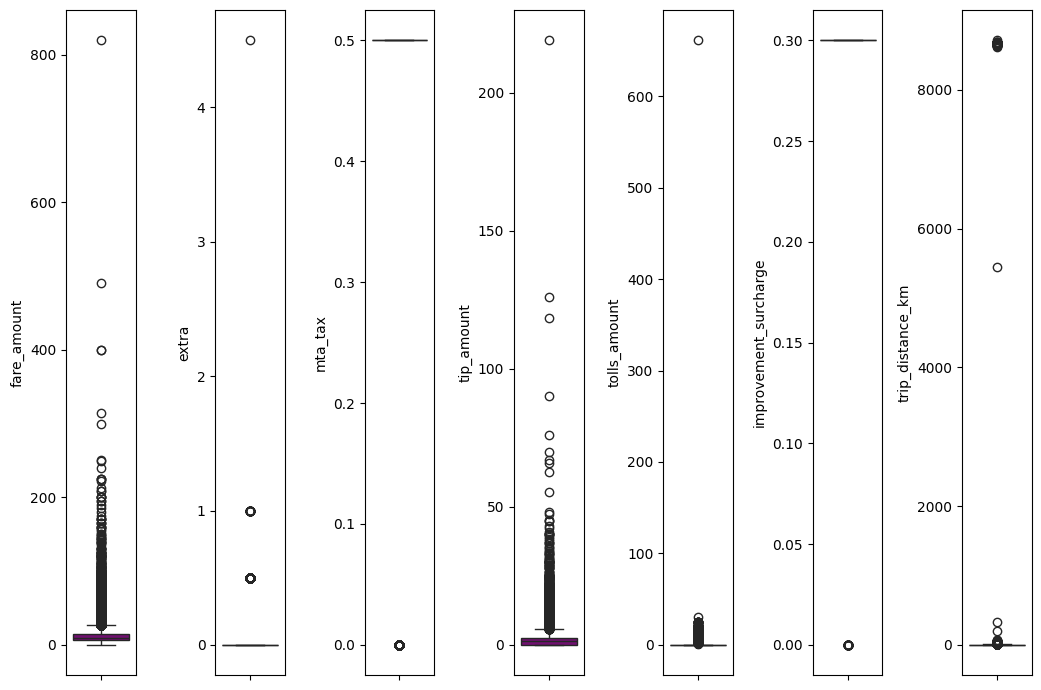

In [80]:
numerical_cols=['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','trip_distance_km']
plt.figure(figsize=(15, 7))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='purple',)
    plt.tight_layout()

In [81]:
data['pick_up_day']=data['tpep_pickup_datetime'].dt.day_name()
data['am_pm'] = data['tpep_pickup_datetime'].dt.strftime('%p')
data['hour']=data['tpep_pickup_datetime'].dt.hour
data['is_night']=data['hour'].apply(lambda x: 0 if (x>=22 or x<5) else 1)


In [82]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,hour,is_night
count,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000,212239.000000
mean,1.708192,1.766339,-73.114137,40.280514,0.032364,0.003114,-73.146207,40.296765,1.323927,12.674500,0.048146,0.498148,1.810291,0.329213,0.299936,15.660219,24.923993,8.733060,0.917075
std,0.454595,1.469499,7.927481,4.365669,0.253832,0.055720,7.785200,4.287851,0.476000,10.869841,0.148046,0.030371,2.507685,2.028692,0.004368,13.585929,433.249539,3.102001,0.275770
min,1.000000,0.000000,-121.933327,0.000000,0.000000,0.000000,-121.933327,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990898,40.740292,0.000000,0.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.156043,7.000000,1.000000
50%,2.000000,1.000000,-73.979469,40.755989,0.000000,0.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000,1.938337,9.000000,1.000000
75%,2.000000,2.000000,-73.963303,40.770283,0.000000,0.000000,-73.964653,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000,3.566124,11.000000,1.000000
max,2.000000,6.000000,0.000000,42.786934,6.000000,1.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000,8713.463111,14.000000,1.000000


In [83]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km', 'pick_up_day', 'am_pm', 'hour', 'is_night'],
      dtype='object')

In [84]:
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212239 entries, 0 to 212238
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               212239 non-null  int64                     
 1   tpep_pickup_datetime   212239 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  212239 non-null  datetime64[ns, UTC]       
 3   passenger_count        212239 non-null  int64                     
 4   pickup_longitude       212239 non-null  float64                   
 5   pickup_latitude        212239 non-null  float64                   
 6   RatecodeID             212239 non-null  float64                   
 7   store_and_fwd_flag     212239 non-null  float64                   
 8   dropoff_longitude      212239 non-null  float64                   
 9   dropoff_latitude       212239 non-null  float64                   
 10  payment_type        

In [86]:
data.nunique


<bound method DataFrame.nunique of         VendorID      tpep_pickup_datetime     tpep_dropoff_datetime  \
0              1 2016-02-29 19:00:00-05:00 2016-03-01 00:07:55+00:00   
1              1 2016-02-29 19:00:00-05:00 2016-03-01 00:11:06+00:00   
2              2 2016-02-29 19:00:00-05:00 2016-03-01 00:31:06+00:00   
3              2 2016-02-29 19:00:00-05:00 2016-03-01 00:00:00+00:00   
4              2 2016-02-29 19:00:00-05:00 2016-03-01 00:00:00+00:00   
...          ...                       ...                       ...   
212234         2 2016-03-01 07:15:37-05:00 2016-03-01 12:38:53+00:00   
212235         2 2016-03-01 07:15:37-05:00 2016-03-01 12:38:22+00:00   
212236         2 2016-03-01 07:15:37-05:00 2016-03-01 12:18:18+00:00   
212237         1 2016-03-01 07:15:38-05:00 2016-03-01 12:22:47+00:00   
212238         1 2016-03-01 07:15:38-05:00 2016-03-01 12:34:59+00:00   

        passenger_count  pickup_longitude  pickup_latitude  RatecodeID  \
0                     1   

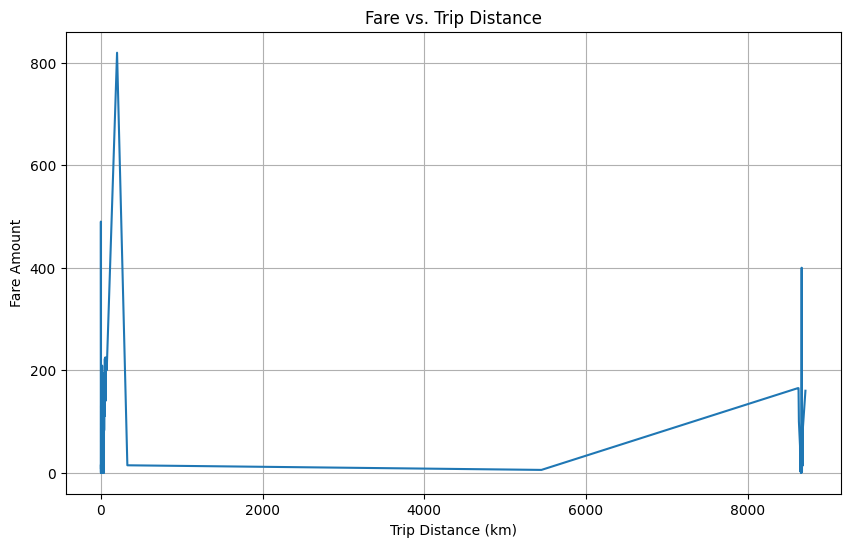

In [87]:
plt.figure(figsize=(10,6))
sns.lineplot(x='trip_distance_km', y='fare_amount', data=data.sort_values('trip_distance_km'))
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount")
plt.title("Fare vs. Trip Distance")
plt.grid(True)

In [88]:
data.shape

(212239, 23)

In [89]:

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


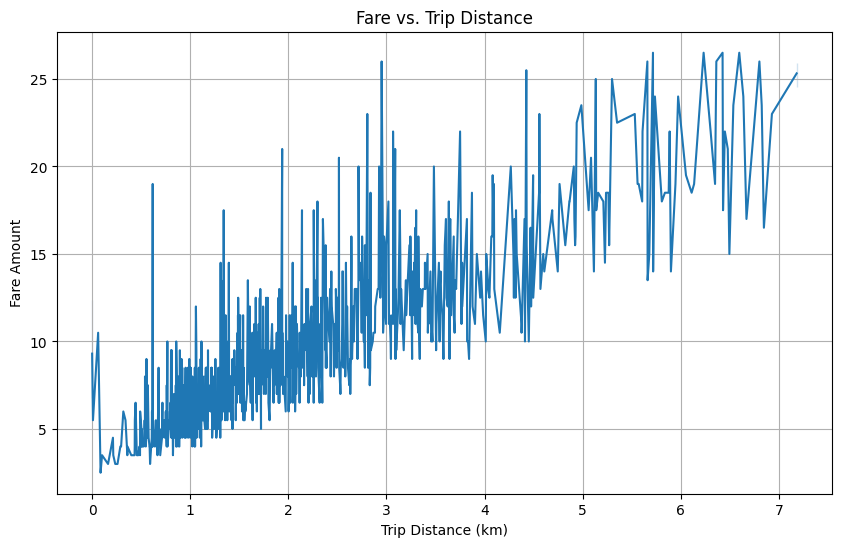

In [90]:
sampled_data = data.sample(n=1000, random_state=42)
plt.figure(figsize=(10,6))
sns.lineplot(x='trip_distance_km', y='fare_amount', data=sampled_data.sort_values('trip_distance_km'))
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount")
plt.title("Fare vs. Trip Distance")
plt.grid(True)

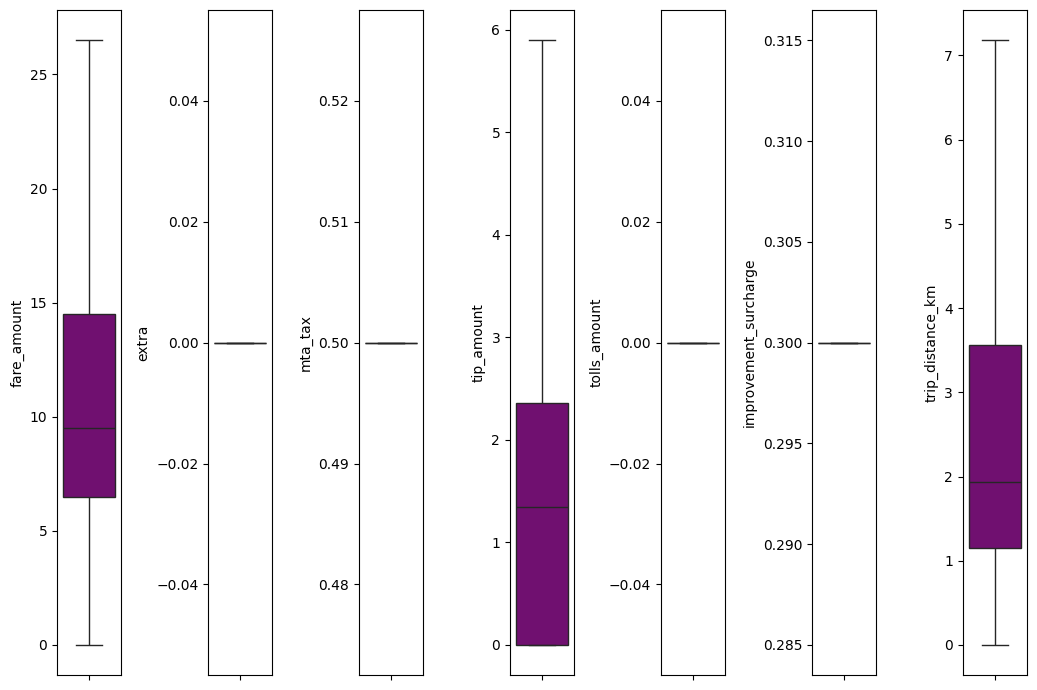

In [91]:
data.shape
numerical_cols=['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','trip_distance_km']
plt.figure(figsize=(15, 7))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='purple',)
    plt.tight_layout()

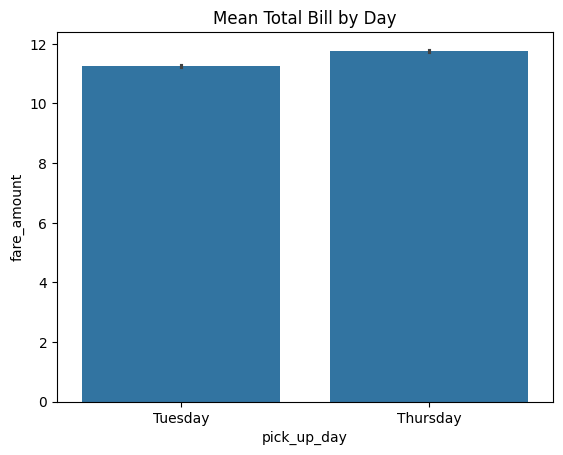

In [92]:
sns.barplot(x='pick_up_day', y='fare_amount', data=data)
plt.title("Mean Total Bill by Day")
plt.show()

In [93]:
data["pick_up_day"].nunique

<bound method IndexOpsMixin.nunique of 0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
212234    Tuesday
212235    Tuesday
212236    Tuesday
212237    Tuesday
212238    Tuesday
Name: pick_up_day, Length: 212239, dtype: object>

In [94]:
data['payment_type'].nunique

<bound method IndexOpsMixin.nunique of 0         1
1         1
2         1
3         1
4         1
         ..
212234    1
212235    1
212236    1
212237    2
212238    2
Name: payment_type, Length: 212239, dtype: int64>

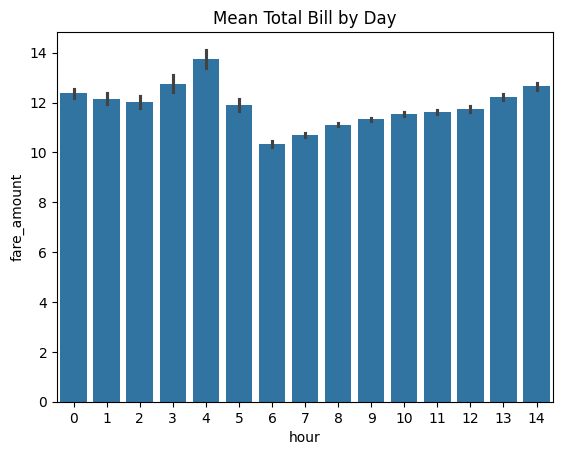

In [95]:
sns.barplot(x='hour', y='fare_amount', data=data)
plt.title("Mean Total Bill by Day")
plt.show()

In [96]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()

VendorID:
 Unique values: 2 
 [1 2]

tpep_pickup_datetime:
 Unique values: 61208 
 <DatetimeArray>
['2016-02-29 19:00:00-05:00', '2016-02-29 19:00:01-05:00',
 '2016-02-29 19:00:02-05:00', '2016-02-29 19:00:03-05:00',
 '2016-02-29 19:00:04-05:00', '2016-02-29 19:00:05-05:00',
 '2016-02-29 19:00:06-05:00', '2016-02-29 19:00:07-05:00',
 '2016-02-29 19:00:08-05:00', '2016-02-29 19:00:09-05:00',
 ...
 '2016-03-01 07:15:29-05:00', '2016-03-01 07:15:30-05:00',
 '2016-03-01 07:15:31-05:00', '2016-03-01 07:15:32-05:00',
 '2016-03-01 07:15:33-05:00', '2016-03-01 07:15:34-05:00',
 '2016-03-01 07:15:35-05:00', '2016-03-01 07:15:36-05:00',
 '2016-03-01 07:15:37-05:00', '2016-03-01 07:15:38-05:00']
Length: 61208, dtype: datetime64[ns, US/Eastern]

tpep_dropoff_datetime:
 Unique values: 63607 
 <DatetimeArray>
['2016-03-01 00:07:55+00:00', '2016-03-01 00:11:06+00:00',
 '2016-03-01 00:31:06+00:00', '2016-03-01 00:00:00+00:00',
 '2016-03-01 00:16:04+00:00', '2016-03-01 00:05:00+00:00',
 '2016-03-01 00:

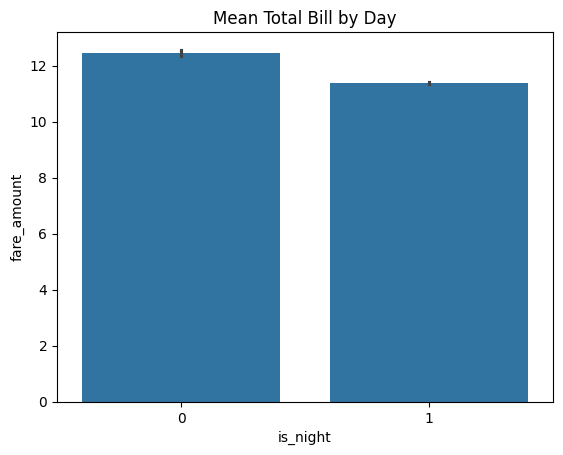

In [97]:
sns.barplot(x='is_night', y='fare_amount', data=data)
plt.title("Mean Total Bill by Day")
plt.show()

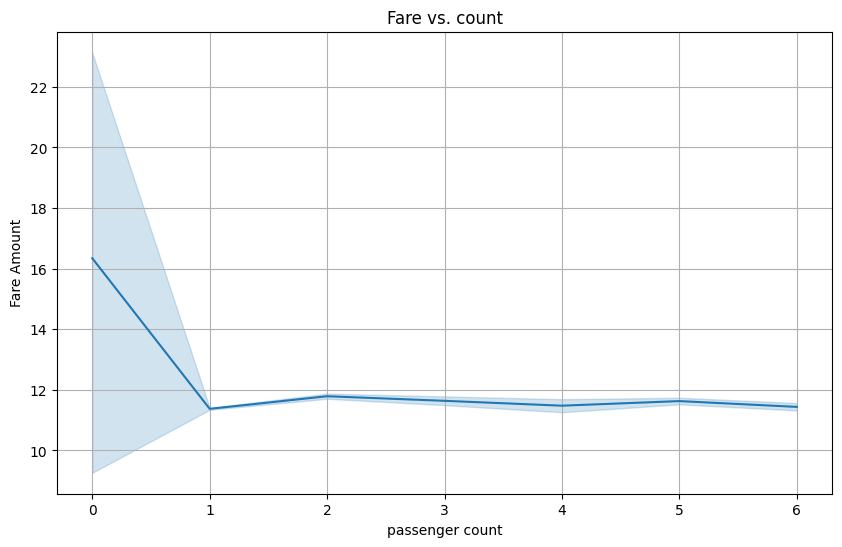

In [98]:
plt.figure(figsize=(10,6))
sns.lineplot(x='passenger_count', y='fare_amount', data=data)
plt.xlabel("passenger count")
plt.ylabel("Fare Amount")
plt.title("Fare vs. count")
plt.grid(True)

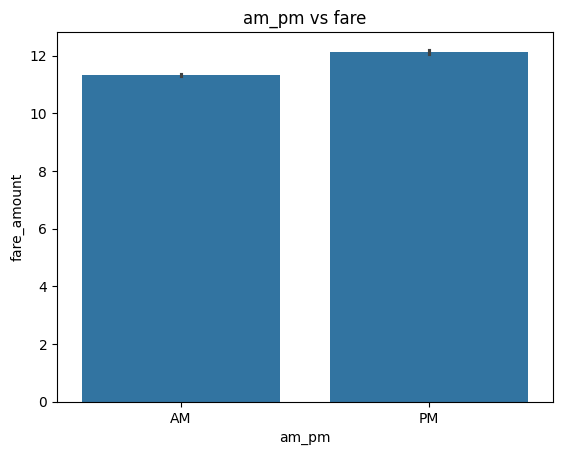

In [99]:
sns.barplot(x='am_pm', y='fare_amount', data=data)
plt.title("am_pm vs fare")
plt.show()

In [100]:
cat_col=['pick_up_day']
cat_ord=OrdinalEncoder()
data[cat_col]=cat_ord.fit_transform(data[cat_col])
cat_col_am = ['am_pm']
cat_ord_am = OrdinalEncoder()
data[cat_col_am] = cat_ord_am.fit_transform(data[cat_col_am])

In [101]:
data.dtypes

VendorID                                      int64
tpep_pickup_datetime     datetime64[ns, US/Eastern]
tpep_dropoff_datetime           datetime64[ns, UTC]
passenger_count                               int64
pickup_longitude                            float64
pickup_latitude                             float64
RatecodeID                                  float64
store_and_fwd_flag                          float64
dropoff_longitude                           float64
dropoff_latitude                            float64
payment_type                                  int64
fare_amount                                 float64
extra                                       float64
mta_tax                                     float64
tip_amount                                  float64
tolls_amount                                float64
improvement_surcharge                       float64
total_amount                                float64
trip_distance_km                            float64
pick_up_day 

In [102]:
columns=['passenger_count','payment_type','tip_amount','trip_distance_km','RatecodeID','hour','pick_up_day']
skewness = data[columns].skew()
print(skewness)

passenger_count      1.887342
payment_type         0.893726
tip_amount           1.068321
trip_distance_km     1.078246
RatecodeID          11.136145
hour                -0.855098
pick_up_day         -0.472287
dtype: float64


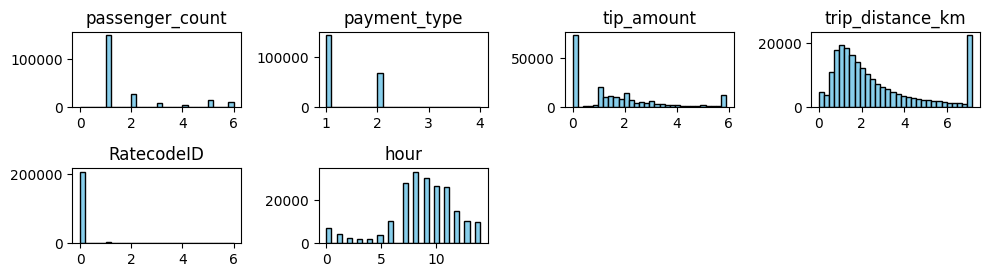

In [103]:
skewed_cols = skewness[abs(skewness) > 0.5].index
plt.figure(figsize=(10, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(3, 4, i)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler
selected=['passenger_count','RatecodeID','tip_amount','trip_distance_km']
data[selected] = data[selected].apply(lambda x: np.log1p(x))


scale_cols = ['hour']

scaler = StandardScaler()
data[['hour']] = scaler.fit_transform(data[['hour']])

In [105]:
from sklearn.ensemble import RandomForestRegressor


X = data[columns]
y = data['total_amount']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importance_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)
print(feature_importance_data)

            Feature  Importance
3  trip_distance_km    0.656423
2        tip_amount    0.150338
4        RatecodeID    0.139096
5              hour    0.030791
0   passenger_count    0.012240
1      payment_type    0.006941
6       pick_up_day    0.004172


<Axes: >

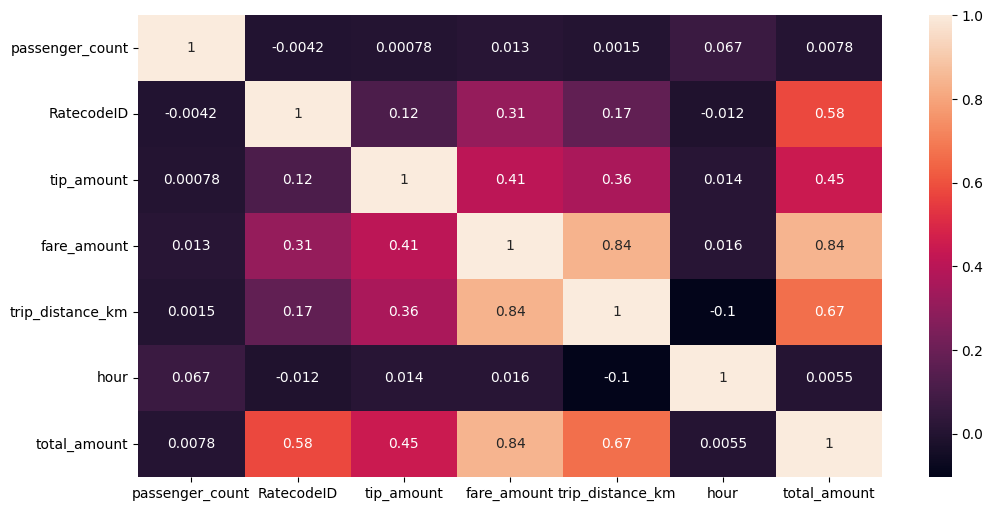

In [106]:
columns_=['passenger_count','RatecodeID','tip_amount','fare_amount','trip_distance_km','hour','total_amount']
corr_matrix = data[columns_].corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True)

In [107]:

print(feature_importance_data['Feature'][:10].tolist())

['trip_distance_km', 'tip_amount', 'RatecodeID', 'hour', 'passenger_count', 'payment_type', 'pick_up_day']


In [108]:
data.dtypes


VendorID                                      int64
tpep_pickup_datetime     datetime64[ns, US/Eastern]
tpep_dropoff_datetime           datetime64[ns, UTC]
passenger_count                             float64
pickup_longitude                            float64
pickup_latitude                             float64
RatecodeID                                  float64
store_and_fwd_flag                          float64
dropoff_longitude                           float64
dropoff_latitude                            float64
payment_type                                  int64
fare_amount                                 float64
extra                                       float64
mta_tax                                     float64
tip_amount                                  float64
tolls_amount                                float64
improvement_surcharge                       float64
total_amount                                float64
trip_distance_km                            float64
pick_up_day 

In [109]:
data = data.reset_index(drop=True)

In [110]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
columns1=['passenger_count','payment_type','tip_amount','trip_distance_km','RatecodeID','hour']
X = data[columns1]
Y = data['total_amount']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [112]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }


results_data = pd.DataFrame(results).T
print(results_data)

                              MAE        MSE      RMSE  R2 Score
Linear Regression        3.747842  43.289680  6.579489  0.755208
Decision Tree Regressor  2.166121  63.030067  7.939148  0.643581
Random Forest Regressor  1.869539  27.633768  5.256783  0.843738
XGBoost Regressor        1.937738  23.969010  4.895816  0.864461
Ridge                    3.748075  43.289168  6.579450  0.755211
Lasso                    3.790609  43.941189  6.628815  0.751524


In [113]:
from sklearn.model_selection import cross_val_score, KFold
Random_Forest_Regressor=RandomForestRegressor(n_estimators=100,max_features=1.0,min_samples_split=2,bootstrap=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(Random_Forest_Regressor, X, Y, cv=kf, scoring='r2')
print(cv_scores)
print(np.mean(cv_scores))



[0.84551938 0.80352188 0.78925255 0.83969394 0.85495836]
0.8265892229378216


In [114]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [80, 100, 200],
    'max_features': [0.5, 'sqrt', 1.0],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    cv=5,
    scoring='r2'
)

random_search.fit(X, Y)

print("Best parameters:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_)


best_rf_model = random_search.best_estimator_

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 0.5, 'bootstrap': True}
Best CV R²: 0.841472555705862


In [115]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

log_transformer = FunctionTransformer(np.log1p, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, selected),
        ('scale', scaler, scale_cols)
    ],
    remainder='passthrough'
)

In [116]:
pipeline2 = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline2.fit(X, Y)


d:\Python\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['passenger_count',
                                                   'RatecodeID', 'tip_amount',
                                                   'trip_distance_km']),
                                                 ('scale', StandardScaler(),
                                                  ['hour'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [117]:
import pickle
with open("pipeline2.pkl",'wb') as file:
  pickle.dump(pipeline2,file )

In [118]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km', 'pick_up_day', 'am_pm', 'hour', 'is_night'],
      dtype='object')

In [119]:
import pandas as pd

my_data = {"passenger_count": [int(input("Enter passenger count: "))],
           'RatecodeID': [int(input("Enter RatecodeID: "))],
           "trip_distance_km": [float(input("Enter trip distance (km): "))],
            "payment_type":[int(input("Enter payment type:"))],
            "hour":[int(input("Enter hour details: "))],
            "tip_amount":[float(input("Enter tip amount:"))]            
        }

data = pd.DataFrame(my_data, index=[0])

print(pipeline2.predict(data))

[93.08]


In [120]:
import os
print(os.getcwd())


c:\Users\kunthavai\Downloads
